# Лабораторная работа №1. Регрессия

# Лабораторная работа №1. Регрессия

**Тема:** *Сравнение линейной регрессии, случайного леса (Random Forest Regressor), градиентного бустинга (XGBoost) на задаче регрессии.*

**Цели:**

- *Научиться строить, оптимизировать и оценивать регрессионные модели.*
- *Понять, как интерпретировать важность признаков (feature importance).*
- *Понять, как увеличивать кол-во признаков (feature tuning).*
- *Исследовать влияние преобразований признаков (фичей), регуляризации и гиперпараметров.*

**Условия:**

- *numpy, pandas, scikit-learn, XGBoost*
- *выбрать датасет для 1-ой и 2-ой лабораторной работы*

**Пункты:**

1. Подготовка данных + Feature Tuning
2. Создание метрик
3. Базовая модель линейной регрессии
4. Улучшение линейной регрессии
5. Случайный лес регрессор
6. Градиентный бустинг (XGBoost)
7. Feature Importance
8. Написание своих реализаций (классы)
9. Подведение итогов


## О команде (ЗАПОЛНИТЬ СВОИМИ ДАННЫМИ)

| Фамилия И.О.        | Группа | Роль в команде | Что делал                    |
|---------------------|--------|----------------|------------------------------|
| Пермяков Г.А.         | 307    | data-scientist | EDA + класс гб       |
| Ивченко М. С.        | 307    | data-scientist | feature tuning + класс регрессии       |
| Крушинин Н. Г.         | 307    | data-scientist | обучение + класс рандофорест       |

 Датасет: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

## Описание датасета
Этот датасет содержит информацию о жилых районах Калифорнии: их географическое расположение, возраст застройки, характеристики домов, численность населения и домохозяйств, уровень доходов жителей, а также медианную стоимость жилья. Дополнительно учитывается близость района к океану.

Основное назначение датасета — изучение факторов, влияющих на стоимость недвижимости, и построение моделей для её предсказания.

---
### **признаки (features)**:

1. **longitude** — долгота: мера того, насколько дом расположен на запад;  
   чем больше значение, тем дальше на запад.

2. **latitude** — широта: мера того, насколько дом расположен на север;  
   чем больше значение, тем дальше на север.

3. **housingMedianAge** — медианный возраст дома в пределах квартала;  
   меньшее значение означает более новые постройки.

4. **totalRooms** — общее количество комнат в пределах квартала.

5. **totalBedrooms** — общее количество спален в пределах квартала.

6. **population** — общее количество жителей в пределах квартала.

7. **households** — общее количество домохозяйств  
   (групп людей, проживающих в одной жилой единице) в пределах квартала.

8. **medianIncome** — медианный доход домохозяйств в пределах квартала  
   (измеряется в десятках тысяч долларов США).

9. **medianHouseValue** — медианная стоимость домов для домохозяйств  
   в пределах квартала (измеряется в долларах США).

10. **oceanProximity** — расположение дома по отношению к океану/морю.

# 0. Глобавльная настройка

In [1]:
RND_SEED = 42

# ! Подготовка данных 

In [2]:
# Install dependencies as needed:
# !pip install -qqq kagglehub folium matplotlib pandas scikit-learn seaborn

import kagglehub
import pandas as pd
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "housing.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "camnugent/california-housing-prices",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/home/matvey/workspace/ClassicML-Sem5/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_25843/2338322763.py:12: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


посмотрим первые 5 строк датасета `df.head(n: int = 5)`


In [3]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

### 1.2 Сбор основной информации о данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Проверка наличия пропусков

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

В датасете есть пропуски в столбце totalBedrooms.

In [6]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Выводы на основе датасета housing.csv:
1.	Общая информация
	-	Размер датасета: 20 640 наблюдений, 10 признаков.
	-	Целевая переменная (median_house_value): среднее ≈ 206 856 $.
→ Это данные по стоимости жилья в Калифорнии, пригодные для обучения моделей регрессии.
2.	География
	-	longitude: среднее ≈ –119.57 (Калифорния).
	-	latitude: среднее ≈ 35.63 (также соответствует географии штата).
→ Координаты корректные, выбросов в описательной статистике не видно.
3.	Возраст домов (housing_median_age)
	-	Среднее ≈ 28.6 лет, дома в среднем довольно «зрелые».
	-	Максимум (из других источников) ограничен 52 → скорее всего, искусственный потолок в данных.
4.	Жилой фонд
	-	total_rooms: среднее ≈ 2636, очень широкий разброс (от единиц до десятков тысяч).
	-	total_bedrooms: среднее ≈ 538, при этом пропущены 207 значений → потребуется обработка (imputation).
	-	Отношение спален к комнатам в среднем ≈ 20%, что выглядит правдоподобно.
5.	Население и домохозяйства
	-	population: среднее ≈ 1425 человек на квартал.
	-	households: среднее ≈ 500 домохозяйств.
	-	В среднем ≈ 2,8 человека на одно домохозяйство → реалистично.
6.	Доходы
	-	median_income: среднее ≈ 3.87 (единица = 10 000 $, то есть доход ≈ 38 700 $).
	-	Диапазон: от 0.5 (≈ 5000 $) до 15+ (≈ 150 000 $).
	-	Это один из самых сильных предикторов стоимости жилья.
7.	Стоимость жилья
	-	median_house_value:
	-	Среднее ≈ 206 856 $.
	-	Известное ограничение сверху: 500 001 $ → ценовые «потолки» могут искажать анализ.
→ Распределение цен скошено вправо, преобладает жильё среднего класса, дорогих домов меньше.
8.	Близость к океану (ocean_proximity)
	-	5 категорий, наиболее частая — <1H OCEAN (9136 объектов).
	-	→ Близость к океану является важным фактором, влияющим на стоимость (дома у океана дороже).

---

#### 🔑 Главные выводы

- 📊 Датасет достаточно большой (**20k строк**) и содержит как числовые, так и категориальные признаки.  

- ⚠️ Есть **пропуски** (в `total_bedrooms`) и **искусственные ограничения**  
  (например, цена жилья сверху ограничена **500 001 $**).  

- 🧩 Ключевые предикторы:  
  - `median_income`  
  - `ocean_proximity`  
  - соотношение **комнат/домохозяйств**  
  - возраст зданий  

- 🛠 Перед построением модели необходимы:  
  - очистка данных  
  - обработка выбросов  
  - нормализация  
  - кодирование категориального признака  

посмотрим на распределение целевой переменной

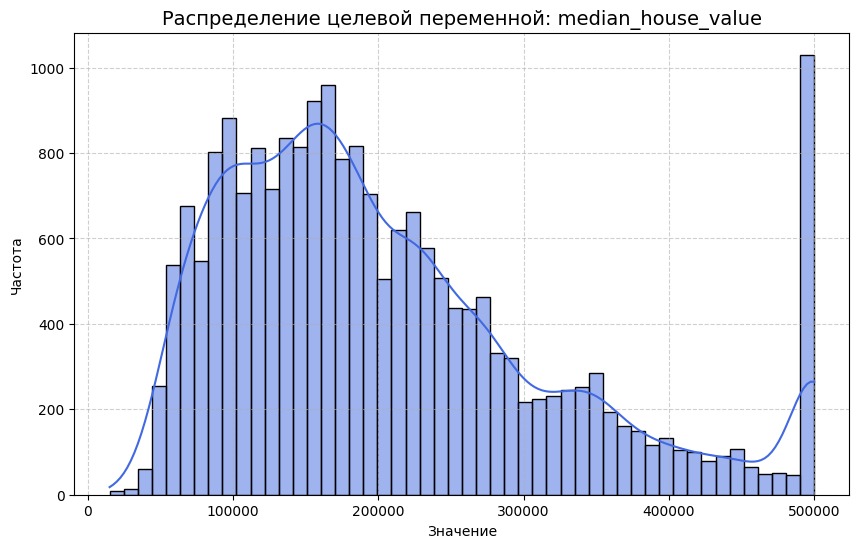

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_target_distribution(df, target_col="median_house_value", bins=50):
    """
    Строит гистограмму распределения целевой переменной.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Датасет с данными
    target_col : str
        Название целевой переменной (по умолчанию 'median_house_value')
    bins : int
        Количество корзин для гистограммы
    """
    plt.figure(figsize=(10,6))
    sns.histplot(df[target_col], bins=bins, kde=True, color="royalblue")
    
    plt.title(f"Распределение целевой переменной: {target_col}", fontsize=14)
    plt.xlabel("Значение")
    plt.ylabel("Частота")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

plot_target_distribution(df, target_col="median_house_value")

**вывод:** распределение целевой переменной скошено вправо, преобладает жильё среднего класса, дорогих домов меньше.

Проверим распределение оставшихся признаков

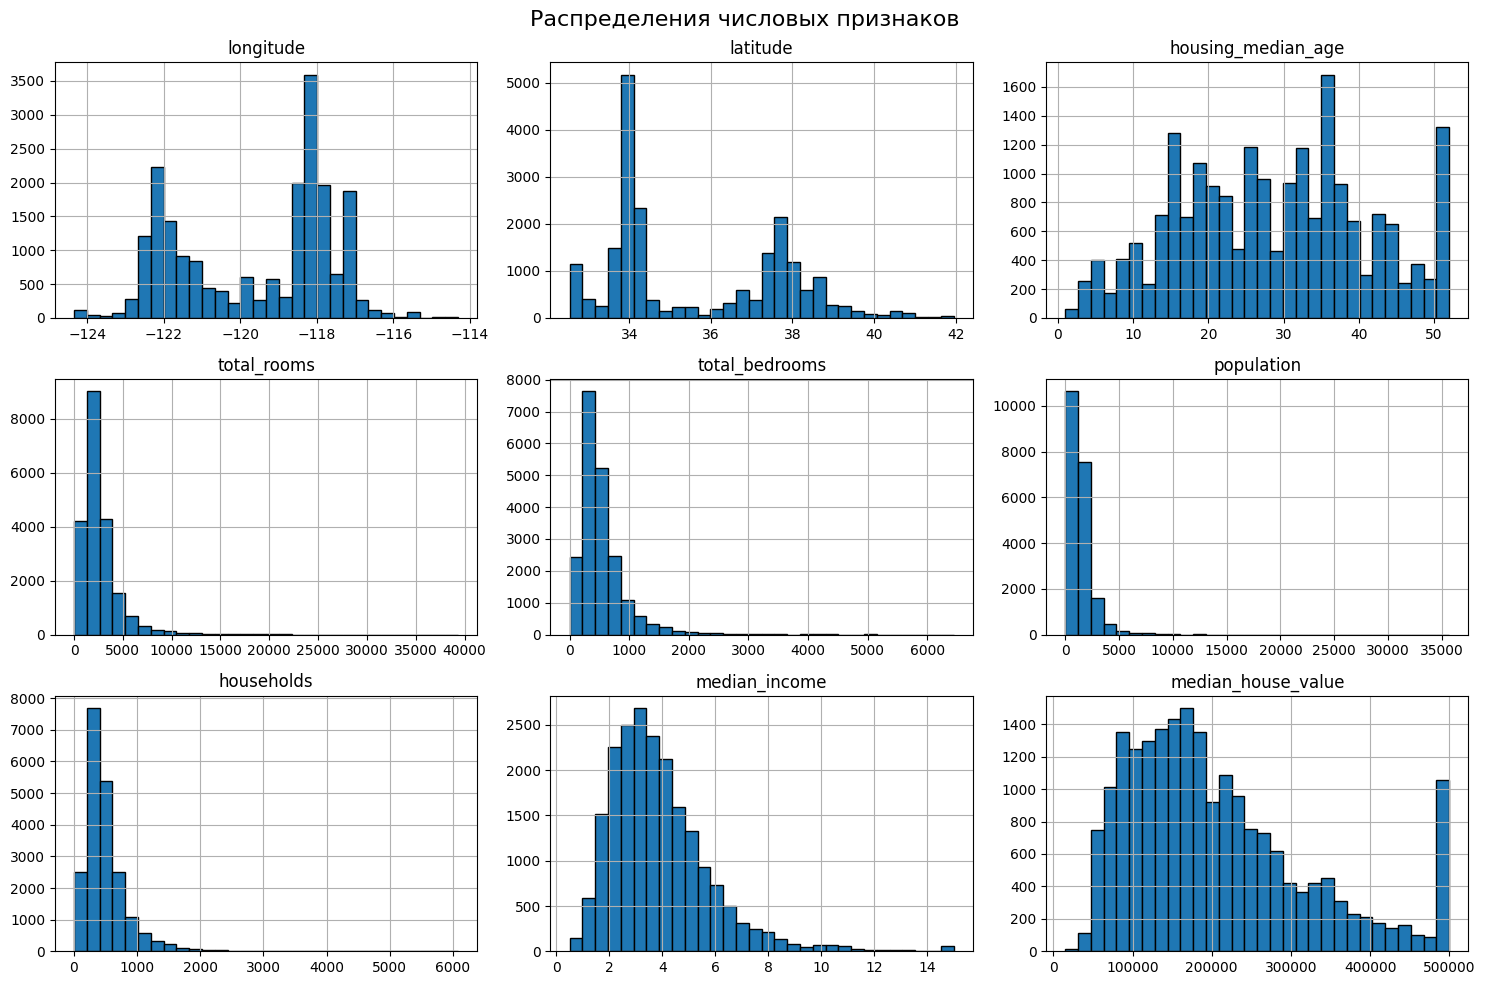

In [8]:
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Распределения числовых признаков", fontsize=16)
plt.tight_layout()
plt.show()

построим карту с помощью folium где будут отображены участки с разным уровнем медианной стоимости жилья

In [9]:

import folium
import numpy as np
import pandas as pd


# 1) Рёбра бинов: 20 ячеек = 21 граница
lat_edges = np.linspace(df["latitude"].min(),  df["latitude"].max(),  101)
lon_edges = np.linspace(df["longitude"].min(), df["longitude"].max(), 101)

# 2) Бинируем координаты в индексы 0..19
df_with_bins = df.copy()
df_with_bins["lat_bin"] = pd.cut(df["latitude"],  bins=lat_edges, labels=False, include_lowest=True)
df_with_bins["lon_bin"] = pd.cut(df["longitude"], bins=lon_edges, labels=False, include_lowest=True)

# выкинем строки, где не попали в бин (NaN)
df2 = df_with_bins.dropna(subset=["lat_bin", "lon_bin"]).copy()
df2["lat_bin"] = df2["lat_bin"].astype(int)
df2["lon_bin"] = df2["lon_bin"].astype(int)

# 3) Агрегация по ячейкам
grid = (df2.groupby(["lat_bin", "lon_bin"])["median_house_value"]
          .median()
          .reset_index())

# 4) Цветовая функция (зелёный -> красный)
min_val, max_val = df2["median_house_value"].min(), df2["median_house_value"].max()
def value_to_color(v):
    r = int(255 * (v - min_val) / (max_val - min_val))
    g = 255 - r
    return f'#{r:02x}{g:02x}00'

# 5) Карта и прямоугольники
m = folium.Map(location=[df2["latitude"].mean(), df2["longitude"].mean()], zoom_start=6)

for lat_bin, lon_bin, med in grid.itertuples(index=False):
    lat0 = lat_edges[lat_bin]
    lat1 = lat_edges[lat_bin + 1]
    lon0 = lon_edges[lon_bin]
    lon1 = lon_edges[lon_bin + 1]

    folium.Rectangle(
        bounds=[[lat0, lon0], [lat1, lon1]],
        fill=True, fill_opacity=0.6, color=None,
        fill_color=value_to_color(med),
        popup=f"Median: {med:.0f}"
    ).add_to(m)

m


Посмотрим на корреляцию данных.

***Определение 1: Корреляция данных — это статистическая мера, показывающая, насколько и в каком направлении связаны между собой две переменные.***

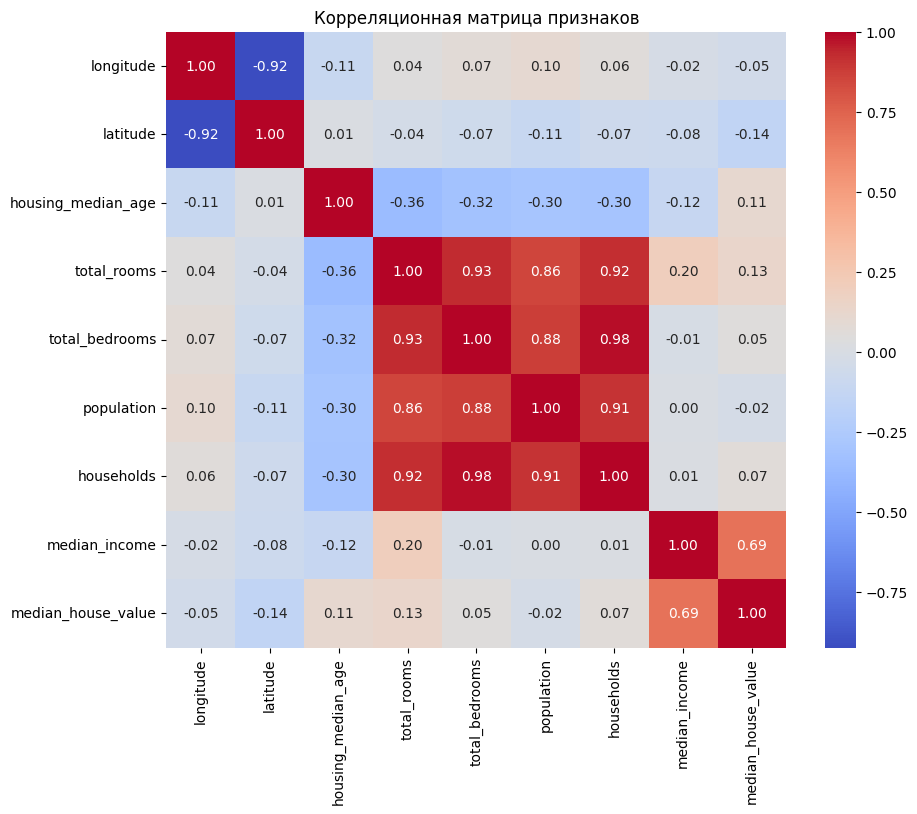

In [10]:
def draw_corr_matrix(df):
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Корреляционная матрица признаков")
    plt.show()

    
df_numeric = df.drop(columns=["ocean_proximity"])
draw_corr_matrix(df_numeric)

## 📊 1.3. Подготовка датасета под разные модели (housing)

| Модель                  | Масштабирование | Корреляция критична | Выбросы критичны | Feature Engineering рекомендуем                                   |
| ----------------------- | --------------- | ------------------- | ---------------- | ----------------------------------------------------------------- |
| **Линейная регрессия**  | Да              | Да                  | Да               | Логарифмирование `median_house_value`, полиномы по `median_income`, отношения (`rooms_per_household`, `bedrooms_per_room`, `population_per_household`) |
| **Random Forest**       | Нет             | Нет                 | Нет              | Соотношения (rooms/households), бинаризация `ocean_proximity`     |
| **XGBoost**             | Нет             | Нет                 | Нет              | Соотношения, логарифмирование целевой переменной (опционально), интеракции доход × возраст зданий |

---

## ✅ TODO для второго человека (Feature Engineering)

1. **Пропуски и выбросы**
   - Заполнить пропуски в `total_bedrooms` (медианой или предсказанием).
   - Проверить выбросы в `median_income` и `housing_median_age`, скорректировать при необходимости.

2. **Создание новых признаков**
   - `rooms_per_household = total_rooms / households`
   - `bedrooms_per_room = total_bedrooms / total_rooms`
   - `population_per_household = population / households`

3. **Географические фичи**
   - Закодировать `ocean_proximity` через One-Hot Encoding.
   - Опционально: добавить бинарный признак «близость к побережью» для категорий `<1H OCEAN` и `NEAR BAY`.

4. **Преобразования целевой переменной**
   - Логарифмировать `median_house_value` для моделей, чувствительных к скошенности (линейная регрессия).
   - Сохранить и версию без логарифма для деревьев и бустингов.
   - Опционально: попробовать квантили взять.

5. **Нормализация**
   - Масштабировать числовые признаки (StandardScaler / MinMaxScaler) — **только для линейной регрессии**.
   - Для деревьев и бустингов масштабирование не требуется.

В прошлом пункте мы выяснили, что выраженной линейной зависимостью с таргетом обладает только признак median_income. Построим графики зависимости целевой переменной от признаков, чтобы в этом убедиться.

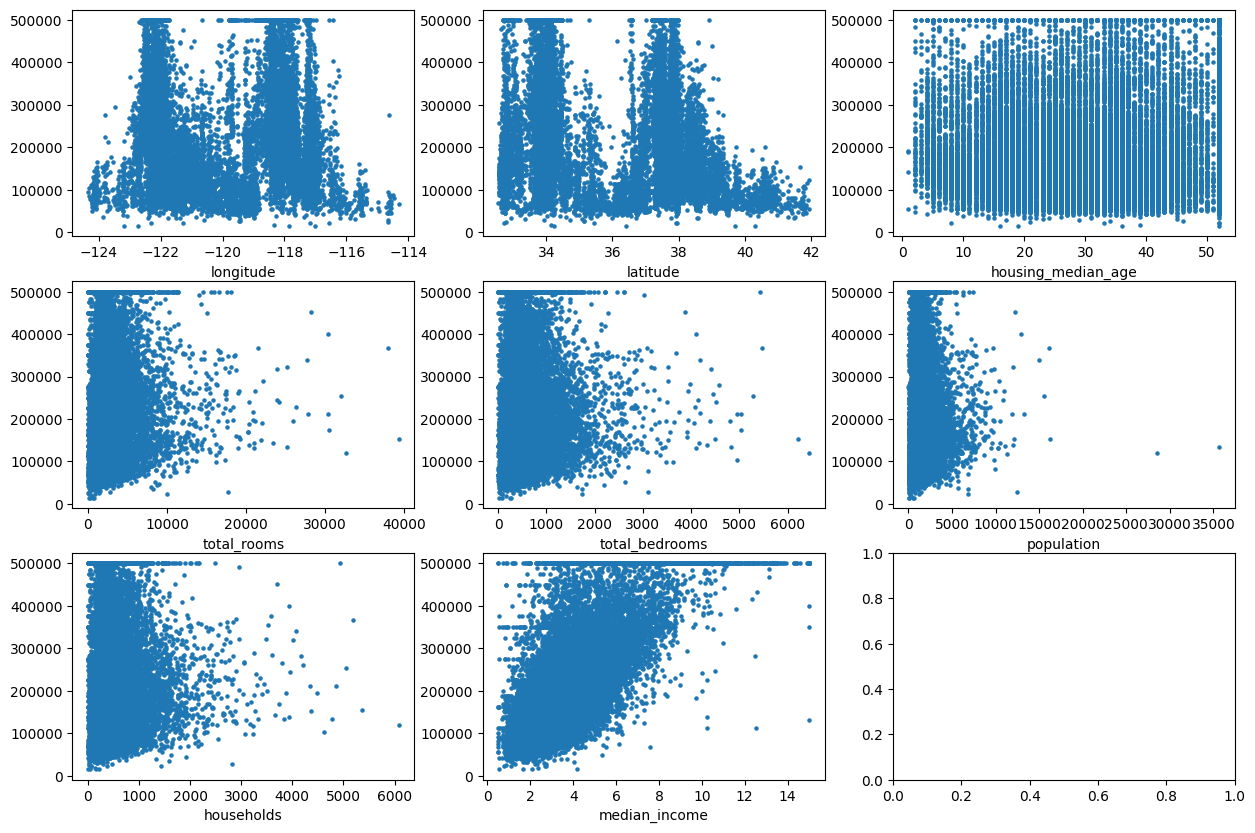

In [11]:
def plot_dependence(ax, df: pd.DataFrame, feature_col: str, target_col: str):
    df_sorted = df.sort_values(by=feature_col)
    ax.scatter(df_sorted[feature_col], df_sorted[target_col], s=5)
    ax.set_xlabel(feature_col)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, feature in enumerate(df.select_dtypes('number').drop('median_house_value', axis=1)):
    plot_dependence(axes[i // 3][i % 3], df, feature, 'median_house_value')

*Мысли*:

1. Очевидно, что долгота и широта на цену напрямую не влияют. Влияет то, в каком районе расположен дом. Значит нужно сделать разбиение этой области, подсчитать среднее или медиану в каждом отрезке разбиения и заменить оба признака на новый признак.
2. Признак totalRooms не несёт эффективной информации, так как он не учитывает численность населения в пределах квартала. Значит, можно заменить этот признак на totalRooms / population
3. Аналогичная история с totalBedrooms. Однако, мы уже выяснили что totalBedrooms и totalRooms линейно зависимы. Нужно проверить, зависимы ли "плотности", и в случае зависимости добавить только признак totalRooms / totalBedrooms, т.к. иметь много спален в одном доме бесмысленно, если там живёт мало человек, но иметь много комнат могут себе позволить только богатые люди.
4. Не уверен в надобности признака households, потому что он сильно зависит от population, но можно добавить признак population / households - средний размер домохозяйства.


Также нужно заполнить пропуски в total_bedrooms. К сожалению понять, имеют ли пропуски физический смысл (отсутствие спален в техническом помещении), не получится - так как остальные признаки аггрегированы по целому кварталу. Поэтому предлагаю заменить пропуски медианов и не париться

In [12]:
df_modified = df.copy()
df_modified['total_bedrooms'] = df_modified['total_bedrooms'].fillna(df_modified['total_bedrooms'].median())

Начнём с простого, добавим признаки rooms_per_people, bedrooms_ratio, households_size:

In [13]:
df_modified['rooms_per_people'] = df_modified['total_rooms'] / df_modified['population']
df_modified['bedrooms_ratio'] = df_modified['total_rooms'] / df_modified['total_bedrooms']
df_modified['households_size'] = df_modified['population'] / df_modified['households']

Теперь напишем класс для обработки признаков longitude и latitude

In [14]:
import numpy as np

class GridMedianTransformer:
    def __init__(self, n_bins=100, target_col="median_house_value", new_feature_name="grid_median_value"):
        """
        n_bins: количество ячеек по каждой оси (по умолчанию 100 → 100x100 сетка)
        target_col: имя целевой переменной в обучающем датасете (для расчёта медиан)
        new_feature_name: имя нового признака в выходном DataFrame
        """
        self.n_bins = n_bins
        self.target_col = target_col
        self.new_feature_name = new_feature_name
        self.lat_edges = None
        self.lon_edges = None
        self.grid_medians = None  # Series с мультииндексом (lat_bin, lon_bin)
        self.global_median = None

    def fit(self, X, y=None):
        """
        X: DataFrame с колонками 'latitude', 'longitude' и (если y=None) target_col
        y: опционально — отдельный Series с целевой переменной
        """
        df = X.copy()
        
        if y is not None:
            df[self.target_col] = y.values
        elif self.target_col not in df.columns:
            raise ValueError(f"Target column '{self.target_col}' must be in X or provided via y")

        # Сохраняем глобальную медиану на случай точек вне сетки
        self.global_median = df[self.target_col].median()

        # Границы бинов — фиксируем по обучающим данным
        self.lat_edges = np.linspace(df["latitude"].min(), df["latitude"].max(), self.n_bins + 1)
        self.lon_edges = np.linspace(df["longitude"].min(), df["longitude"].max(), self.n_bins + 1)

        # Бинируем координаты
        df["lat_bin"] = pd.cut(df["latitude"], bins=self.lat_edges, labels=False, include_lowest=True)
        df["lon_bin"] = pd.cut(df["longitude"], bins=self.lon_edges, labels=False, include_lowest=True)

        # Удаляем строки, где бин не определён (маловероятно, но возможно)
        df = df.dropna(subset=["lat_bin", "lon_bin"]).copy()
        df["lat_bin"] = df["lat_bin"].astype(int)
        df["lon_bin"] = df["lon_bin"].astype(int)

        # Агрегация: медиана по ячейкам
        self.grid_medians = (
            df.groupby(["lat_bin", "lon_bin"])[self.target_col]
            .median()
        )
        return self

    def transform(self, X):
        """
        X: DataFrame с колонками 'latitude', 'longitude'
        Возвращает: новый DataFrame без 'latitude', 'longitude',
                    с добавленной колонкой self.new_feature_name
        """
        if self.lat_edges is None or self.lon_edges is None:
            raise ValueError("Transformer has not been fitted yet. Call fit() first.")

        df = X.copy()

        # Бинируем новые координаты теми же границами
        lat_bins = pd.cut(df["latitude"], bins=self.lat_edges, labels=False, include_lowest=True)
        lon_bins = pd.cut(df["longitude"], bins=self.lon_edges, labels=False, include_lowest=True)

        # Преобразуем в целые числа, NaN остаются как NaN
        lat_bins = pd.to_numeric(lat_bins, errors='coerce').astype('Int64')
        lon_bins = pd.to_numeric(lon_bins, errors='coerce').astype('Int64')

        # Создаём индекс для поиска в grid_medians
        idx = pd.MultiIndex.from_arrays([lat_bins, lon_bins], names=["lat_bin", "lon_bin"])

        # Получаем медианы; где нет — будет NaN
        medians = self.grid_medians.reindex(idx).values

        # Заполняем пропуски глобальной медианой
        medians = np.where(pd.isna(medians), self.global_median, medians)

        # Формируем результат: копируем все колонки, кроме координат
        result_df = df.drop(columns=["latitude", "longitude"]).copy()
        result_df[self.new_feature_name] = medians

        return result_df

In [15]:
grid_transformer = GridMedianTransformer(target_col='median_house_value', new_feature_name='grid_median_value')
grid_transformer.fit(df_modified)
df_modified = grid_transformer.transform(df_modified)

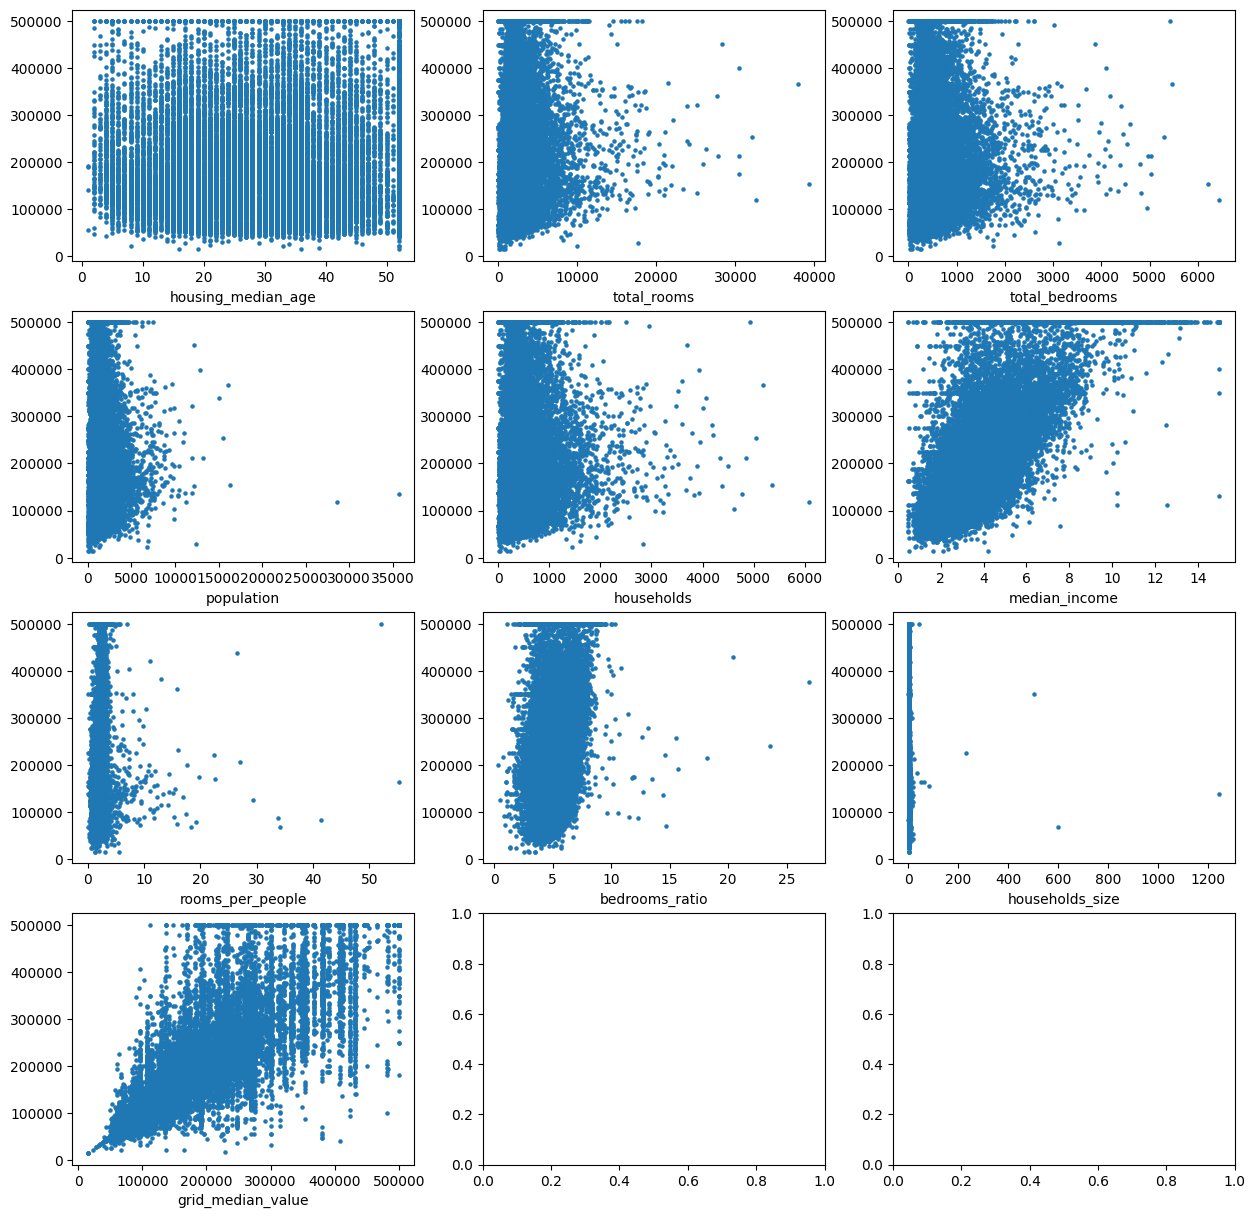

In [16]:
def plot_dependence(ax, df: pd.DataFrame, feature_col: str, target_col: str):
    df_sorted = df.sort_values(by=feature_col)
    ax.scatter(df_sorted[feature_col], df_sorted[target_col], s=5)
    ax.set_xlabel(feature_col)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

for i, feature in enumerate(df_modified.select_dtypes('number').drop('median_house_value', axis=1)):
    plot_dependence(axes[i // 3][i % 3], df_modified, feature, 'median_house_value')

В households_size, bedrooms_ratio и rooms_per_people какие-то адские выбросы. Попробуем их убрать

In [17]:
def remove_outliers_by_percentile(
    df,
    columns=None,
    lower_percentile=1,
    upper_percentile=99,
    return_bounds=False
):
    """
    Удаляет строки из DataFrame, где хотя бы один из указанных признаков
    выходит за пределы [lower_percentile, upper_percentile].

    Параметры:
    ----------
    df : pd.DataFrame
        Исходный датасет.
    columns : list или None
        Список колонок для проверки на выбросы.
        Если None — используются все числовые колонки.
    lower_percentile : float, по умолчанию 5
        Нижний процентиль (например, 5 = 5%).
    upper_percentile : float, по умолчанию 95
        Верхний процентиль (например, 95 = 95%).
    return_bounds : bool, по умолчанию False
        Если True, возвращает также словарь с границами.

    Возвращает:
    ----------
    df_clean : pd.DataFrame
        DataFrame без строк-выбросов.
    bounds (опционально) : dict
        {col: (low, high), ...} — границы для каждой колонки.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame")

    if not (0 <= lower_percentile < upper_percentile <= 100):
        raise ValueError("Percentiles must satisfy 0 <= lower < upper <= 100")

    # Определяем колонки для обработки
    if columns is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    else:
        missing = set(columns) - set(df.columns)
        if missing:
            raise ValueError(f"Columns not found in DataFrame: {missing}")
        cols = columns

    if not cols:
        raise ValueError("No numeric columns to process")

    # Вычисляем границы на основе исходного df
    bounds = {}
    mask = pd.Series([True] * len(df), index=df.index)

    for col in cols:
        low = df[col].quantile(lower_percentile / 100)
        high = df[col].quantile(upper_percentile / 100)
        bounds[col] = (low, high)
        # Обновляем маску: оставляем только те строки, где значение в пределах
        mask &= (df[col] >= low) & (df[col] <= high)

    df_clean = df[mask].copy()

    if return_bounds:
        return df_clean, bounds
    else:
        return df_clean

In [18]:
df_modified_clean = remove_outliers_by_percentile(df_modified, columns=['households_size', 'rooms_per_people', 'bedrooms_ratio'], lower_percentile=1, upper_percentile=99)

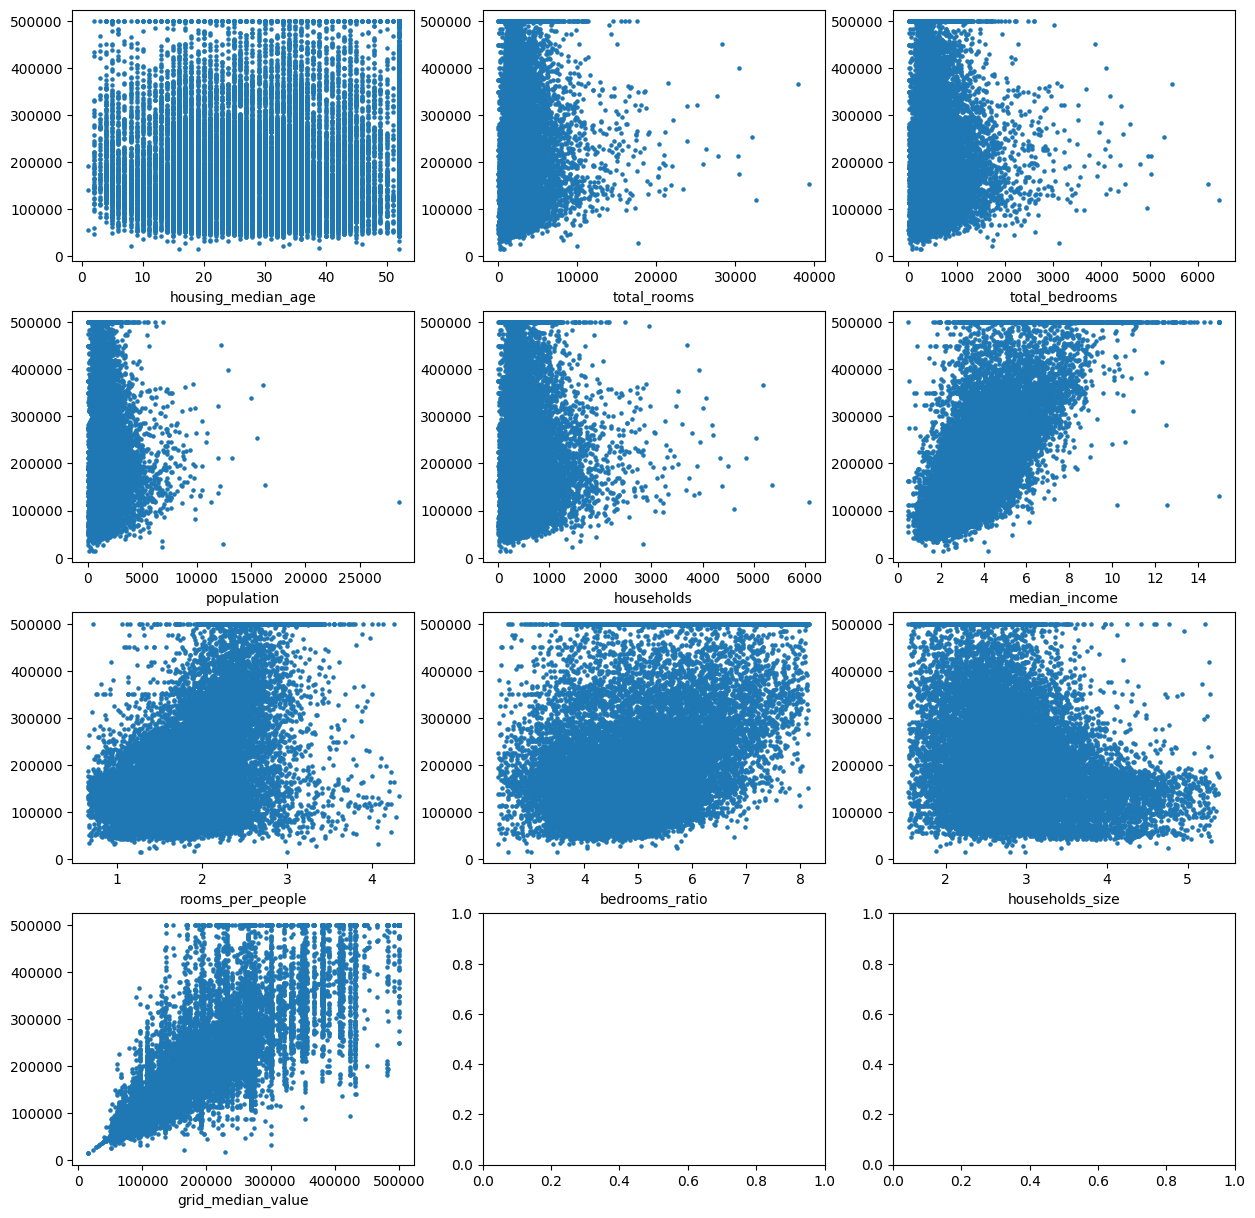

In [19]:
def plot_dependence(ax, df: pd.DataFrame, feature_col: str, target_col: str):
    df_sorted = df.sort_values(by=feature_col)
    ax.scatter(df_sorted[feature_col], df_sorted[target_col], s=5)
    ax.set_xlabel(feature_col)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

for i, feature in enumerate(df_modified_clean.select_dtypes('number').drop('median_house_value', axis=1)):
    plot_dependence(axes[i // 3][i % 3], df_modified_clean, feature, 'median_house_value')

в households_size что-то отдалённо напоминающее гиперболу, давайте поменяем соотношение, чтобы получить прямую зависимость

In [20]:
df_modified_clean['households_size'] = df_modified['households'] / df_modified['population']
df_modified_clean = remove_outliers_by_percentile(df_modified_clean, columns=['households_size'], lower_percentile=1, upper_percentile=99)

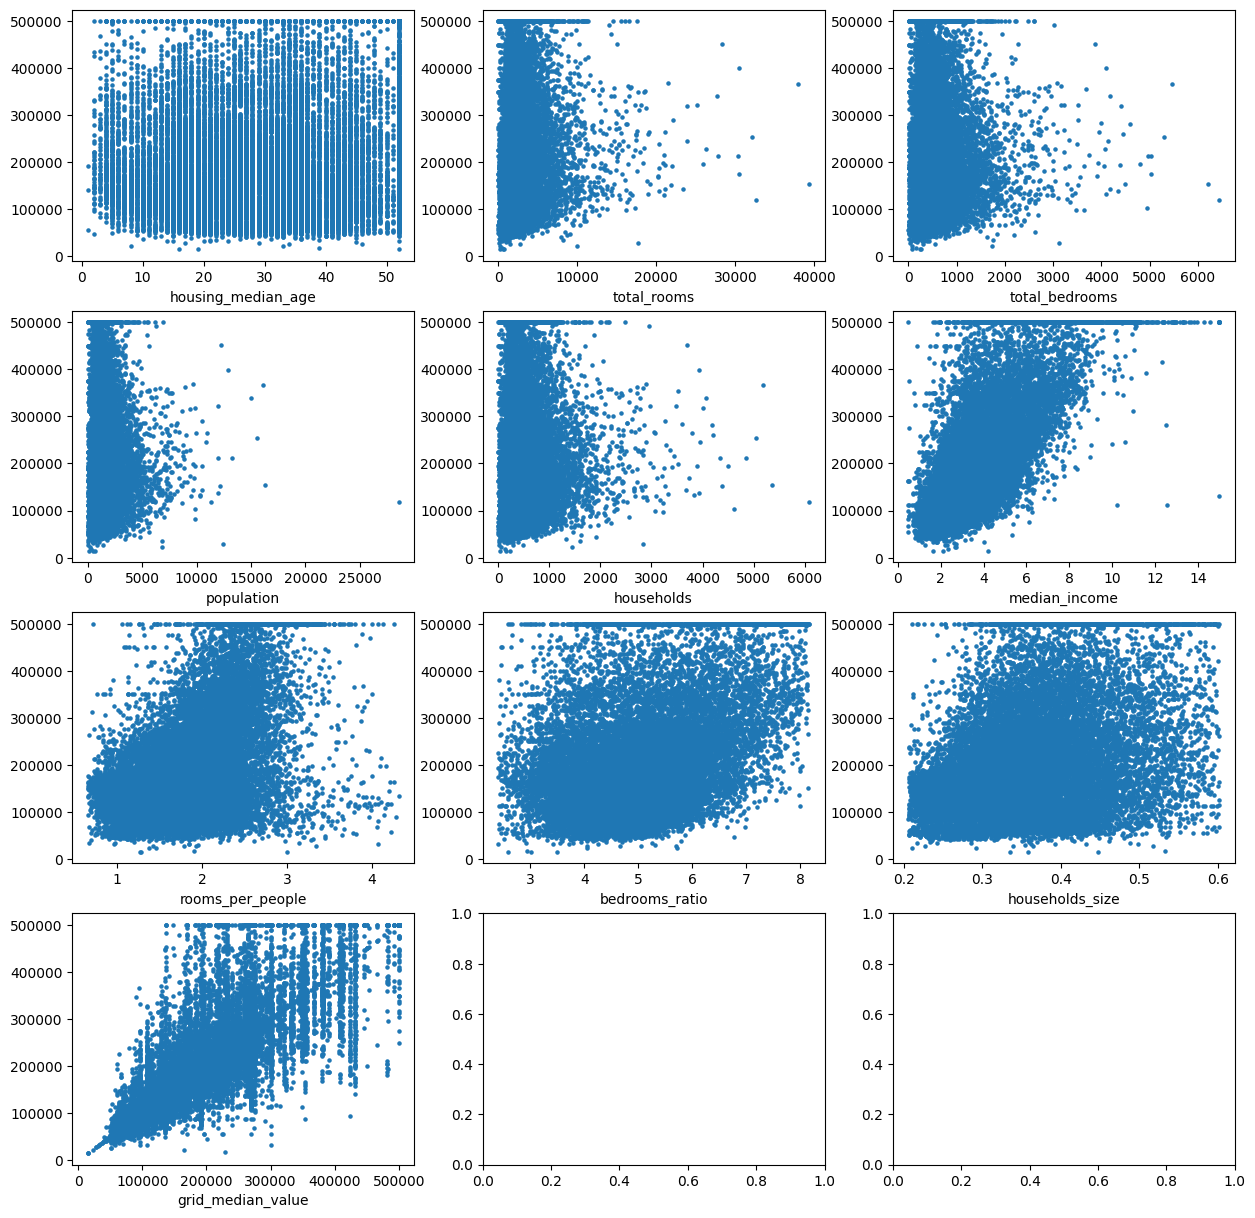

In [21]:
def plot_dependence(ax, df: pd.DataFrame, feature_col: str, target_col: str):
    df_sorted = df.sort_values(by=feature_col)
    ax.scatter(df_sorted[feature_col], df_sorted[target_col], s=5)
    ax.set_xlabel(feature_col)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

for i, feature in enumerate(df_modified_clean.select_dtypes('number').drop('median_house_value', axis=1)):
    plot_dependence(axes[i // 3][i % 3], df_modified_clean, feature, 'median_house_value')

Наконец, давайте сделаем OneHotEncoding для единственного категориального признака, так как в нём совсем немного уникальных значений:

In [22]:
set(df['ocean_proximity'].values)

{'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

In [23]:
df_modified_clean.isna().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
rooms_per_people      0
bedrooms_ratio        0
households_size       0
grid_median_value     0
dtype: int64

In [28]:
from sklearn.preprocessing import OneHotEncoder

ohe_encoder = OneHotEncoder(sparse_output=False)
encoded_df = ohe_encoder.fit_transform(df_modified_clean[['ocean_proximity']])

# Получаем имена новых столбцов
feature_names = ohe_encoder.get_feature_names_out(['ocean_proximity'])

# Преобразуем обратно в DataFrame
df_result = pd.concat([
    df_modified_clean.select_dtypes(include='number'),
    pd.DataFrame(encoded_df, columns=feature_names, index=df_modified_clean.index)
], axis=1)
df_result

housing_median_age  total_rooms  total_bedrooms  population  \
0                    41.0        880.0           129.0       322.0   
1                    21.0       7099.0          1106.0      2401.0   
2                    52.0       1467.0           190.0       496.0   
3                    52.0       1274.0           235.0       558.0   
4                    52.0       1627.0           280.0       565.0   
...                   ...          ...             ...         ...   
20635                25.0       1665.0           374.0       845.0   
20636                18.0        697.0           150.0       356.0   
20637                17.0       2254.0           485.0      1007.0   
20638                18.0       1860.0           409.0       741.0   
20639                16.0       2785.0           616.0      1387.0   

       households  median_income  median_house_value  rooms_per_people  \
0           126.0         8.3252            452600.0          2.732919   
1          1138.0         8.3014            358500.0          2.956685   
2           177.0         7.2574            352100.0          2.957661   
3           219.0         5.6431            341300.0          2.283154   
4           259.0         3.8462            342200.0          2.879646   
...           ...            ...                 ...               ...   
20635       330.0         1.5603             78100.0          1.970414   
20636       114.0         2.5568             77100.0          1.957865   
20637       433.0         1.7000             92300.0          2.238332   
20638       349.0         1.8672             84700.0          2.510121   
20639       530.0         2.3886             89400.0          2.007931   

       bedrooms_ratio  households_size  grid_median_value  \
0            6.821705         0.391304           367100.0   
1            6.418626         0.473969           367100.0   
2            7.721053         0.356855           367100.0   
3            5.421277         0.392473           191700.0   
4            5.810714         0.458407           191700.0   
...               ...              ...                ...   
20635        4.451872         0.390533            78100.0   
20636        4.646667         0.320225            84700.0   
20637        4.647423         0.429990            84700.0   
20638        4.547677         0.470985            84700.0   
20639        4.521104         0.382120            89400.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     0.0   
1                            0.0                     0.0   
2                            0.0                     0.0   
3                            0.0                     0.0   
4                            0.0                     0.0   
...                          ...                     ...   
20635                        0.0                     1.0   
20636                        0.0                     1.0   
20637                        0.0                     1.0   
20638                        0.0                     1.0   
20639                        0.0                     1.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       1.0   
1                         0.0                       1.0   
2                         0.0                       1.0   
3                         0.0                       1.0   
4                         0.0                       1.0   
...                       ...                       ...   
20635                     0.0                       0.0   
20636                     0.0                       0.0   
20637                     0.0                       0.0   
20638                     0.0                       0.0   
20639                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2     

# Написание класса GradientBoostingRegressor
